In [85]:
# работа с данными
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# нормализация
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

from scipy import stats
from scipy.stats import skew, kurtosis, ttest_ind
from scipy.stats import trim_mean, trimboth, tmean, tstd, ttest_1samp, gmean, hmean, mode
from scipy.stats import percentileofscore, scoreatpercentile
import statistics

from collections import Counter

In [86]:
from scipy.signal import find_peaks
from sklearn.metrics import f1_score

In [87]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.linear_model import Lasso 



# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import Sequential
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# import random

# Const

In [88]:
feature = ['Дальность', 'Основное положение к регистратору', 'Наименование файла', 'Тип объекта']

# Создание словаря для типа техники
type_dict = {
    'гусеничная техника': 0,
    'колесная техника': 1,
}

# Создание словаря для направления движения
direction_dict = {
    'влево': 0,
    'фронтальное': 0,
    'фронтальное (влево)': 0,
    'фронтальное (вправо)': 0,
    'облическое': 2,
    'облическое ': 2,
    'фронтально-облическое' : 2,
    'фронтально-облическое (влево)': 2,
    'фронтально-облически (влево)': 2,
    'фронтально-облическое (вправо)': 2,
    'кормовое': 4,
    'фронтально-кормовое': 4,
    'фронтально-кормовое (влево)': 4,
    'фронтально-кормовое (вправо)' : 4,
    'разворот': 5
}

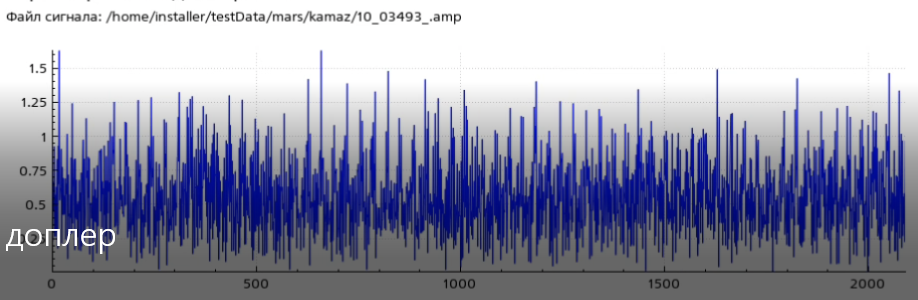

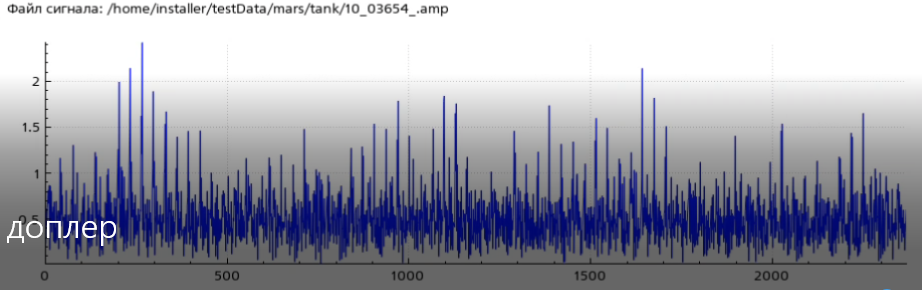

# Функции

In [5]:
# Среднее (Mean)
# Доверительный интервал (Confidence Interval)
# Доверительный интервал (Confidence Interval)
# Обрезанное среднее (Trimmed Mean)
# Усеченное среднее (Winsorized Mean)
# Тест Граббса (Grubbs Test)
# p-значение (p-value)
# Геометрическое среднее (Geometric Mean)
# Гармоническое среднее (Harmonic Mean)
# Медиана (Median)
# Мода (Mode)
# Частота (Frequency)
# Сумма (Sum)
# Минимум (Minimum)
# Максимум (Maximum)
# Нижний квартиль (Lower Quartile)
# Верхний квартиль (Upper Quartile)
# Процентиль (Percentile)
# Процентиль (Percentile)
# Размах (Range)
# Квартиль (Quartile)
# Дисперсия (Variance)
# Стандартное отклонение (Standard Deviation)
# Стандартное отклонение (Standard Deviation)
# Коэффициент вариации (Coefficient of Variation)
# Стандартизированное (Standardized)
# Асимметрия (Skewness)
# Стандартная ошибка (Standard Error)
# Куртозис (Kurtosis)
# Стандартная ошибка (Standard Error)

In [6]:
# Межквартильный диапазон (IQR):
def detect_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

# Стандартное отклонение от среднего
def detect_outliers_std(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    outliers = [x for x in data if abs(x - mean) > threshold * std]
    return outliers

In [7]:
# # Ящик с усами (boxplot)
# def plot_boxplot_with_outliers(data):
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data=data)
#     plt.title("Boxplot с выбросами")
#     plt.xlabel("Data")
#     plt.ylabel("Values")
#     plt.show()

# # Пример использования
# data = df['Mean']
# plot_boxplot_with_outliers(data)

In [8]:
def getAnamalies(data):
    print("Мин-сред-макс:", np.min(data), round(np.mean(data), 3), np.max(data))
    
    # Межквартильный диапазон (IQR):
    outliers_quer = detect_outliers_iqr(data)
    # print("Выбросы по методу IQR:", outliers_quer)
    index_quer = [i for i, length in enumerate(data) if length in outliers_quer]
    # print("Выбросы по методу IQR:", index_quer)
    
    # Стандартное отклонение от среднего
    outliers_std = detect_outliers_std(data)
    # print("Выбросы по методу std-err:", outliers_std)
    index_std = [i for i, length in enumerate(data) if length in outliers_std]
    # print("Выбросы по методу IQR:", index_std)
    
    # Получение значений, которые входят в оба массива
    common_values = set(index_quer).intersection(set(index_std))
    common_values = None if common_values == set() else common_values
    # print("Индексы выбросов:", common_values)

    # print("Кол-во выбросов:", len(common_values) if common_values else 0, '/', len(data))
    # for index in common_values:
    #     print("Индекс:", index, "Значение:", data[index])

    print("Кол-во выбросов, индексы:", len(common_values) if common_values else 0, '/', len(data), common_values)
    
    return common_values

def getAnamaliesInDF(df):
    index_keys_array = []
    for key in df.keys():
        if key == 'id' or key == 'len': continue
        print('\n', key)
        data = df[key]
        index_keys_array.append(getAnamalies(data))

    # Подсчет количества встречаемых выбросов
    outliers = [outliers for outliers in index_keys_array if outliers is not None]
    all_outliers = set().union(*outliers)
    outliers_counter = Counter(outlier for sublist in outliers for outlier in sublist)
    print("Статистика по выбросам:")
    for outlier, frequency in outliers_counter.items():
        print(f"Выброс: {outlier}, кол-во: {frequency}")

In [9]:
def saveCsvFile(df, filename):
    df.to_csv(filename, index=False, sep=';', encoding='utf-8-sig')

In [10]:
def find_file_by_name(dir, filename):
    if not os.path.exists(dir):
        print(f"Директория '{dir}' не существует.")
        return None

    if dir == './autumn/annotations':
        dir_files = dir_files_autumn
    else: 
        dir_files = dir_files_spring
        
    for file in dir_files:
        if file == filename:
            return os.path.join(dir, file)
    
    print(f"Файл не найден '{os.path.join(dir, file)}'.")
    return None


def read_data_from_files(df, dir_path):
    for i, row in df.iterrows():
        file_name = row['Наименование файла']
        if file_name == "-":
            continue
            
        file_path = find_file_by_name(dir_path, file_name + '.txt')
        if file_path is None:
            continue
       
        file = open(file_path, mode='r')
        data_signal = file.read().split(';')
        file.close()
        list_signals.append([int(row['Тип объекта']), int(row['Основное положение к регистратору']), (row['Дальность'])] + data_signal[:-1])

In [115]:
def getStatisticaValue(data):
    min_value = np.min(data)
    max_value = np.max(data)
    mediana_value = np.median(data)
    
    mean_value = np.mean(data) 
    geometric_mean = gmean(data)  # Геометрическое среднее
    harmonic_mean = hmean(data)   # Гармоническое среднее     

    # mode_value = mode(data).mode       # Мода
    # frequency = mode(data).count       # Частота
    data_sum = sum(data)               # Сумма
    data_range = max_value -min_value  # Размах
    
    value_quantile = np.quantile(data, [1/4, 3/4])  # 25-й и 75-й процентиль
    lower_quartile = percentileofscore(data, value_quantile[0])  # Нижний квартиль
    upper_quartile = percentileofscore(data, value_quantile[1])  # Верхний квартиль
    
    var_value = np.var(data)    # Дисперсия
    skew_value = skew(data)     # Асимметрия
    kurt_value = kurtosis(data) # Куртозис

    std_value = np.std(data) # Стандартная отклонение (Standard Error)
    coef_of_variation = std_value / mean_value  # Коэффициент вариации
    std_error = std_value / np.sqrt(len(data))  # Стандартная ошибка

    # confidence_interval = tmean(data), tstd(data)  # Доверительный интервал    
    # grubbs_test, p_value = ttest_1samp(data, tmean(data))  # Тест Граббса (Grubbs Test) и p-значение

    d_top = max_value-mediana_value
    d_bottom = mediana_value-min_value

    diff = (mediana_value - min_value) / (max_value - min_value) * 100
    
    statistic = [
        min_value, max_value, mediana_value, d_bottom, d_top, diff,
        mean_value, geometric_mean, harmonic_mean, 
        # mode_value, frequency,
        data_sum, data_range, 
        # value_quantile[0], value_quantile[1], 
        value_quantile[0], value_quantile[1],
        var_value, skew_value, kurt_value,
        std_value, coef_of_variation, std_error,
        # grubbs_test, p_value
    ]

    koef_round = 3
    statistic_rounded = [round(element, koef_round) if isinstance(element, (int, float)) else element for element in statistic]
    
    return statistic_rounded

def signalsPeaks(data):
    signal = np.array(data)
    peaks, _ = find_peaks(signal)
    
    # rise_times = []
    # fall_times = []    
    value_quantile = np.quantile(data, [1/4, 3/4])  
    arr_peaks = [peak for peak in peaks if signal[peak] > value_quantile[1]]
    val_peaks = [signal[peak] for peak in arr_peaks]
    # for peak_index in peaks:
    #     peak_value = signal[peak_index] # значение пика
        # # Находим индекс, когда сигнал пересекает 10% и 90% от значения пика
        # rise_level = 0.1 * peak_value
        # fall_level = 0.9 * peak_value
    
        # # Находим индекс, когда сигнал пересекает уровни времени нарастания
        # rise_index = np.where(signal[:peak_index] >= rise_level)[0][-1]  # Последний индекс, когда сигнал стал больше 10% от значения пика
        
        # # Проверяем, есть ли значения сигнала после пика для вычисления fall_index
        # if len(signal[peak_index:]) > 0:
        #     fall_indices = np.where(signal[peak_index:] <= fall_level)[0]
        #     if len(fall_indices) > 0:
        #         fall_index = fall_indices[0] + peak_index  # Первый индекс, когда сигнал стал меньше 90% от значения пика
        #     else:
        #         continue  # Пропускаем пики, для которых нет значений после
        # else:
        #     continue  # Пропускаем пики, для которых нет значений после
        
        # # # Вычисляем время нарастания и спада
        # # rise_time = time[rise_index]
        # # fall_time = time[fall_index]
    
        # rise_times.append(rise_index)
        # fall_times.append(fall_index)
    
    # print("Среднее время нарастания:", np.mean(rise_times))
    # print("Среднее время спада:", np.mean(fall_times))

    results = [
        # np.mean(rise_times), np.mean(fall_times),
        len(arr_peaks), np.mean(val_peaks)
    ]

    koef_round = 3
    results_rounded = [round(element, koef_round) if isinstance(element, (int, float)) else element for element in results]
    
    return results_rounded

def getStatisticaTable(list_array):
    # # заготовка под графики
    # num = 3
    # num_rows = (len(list_array) + num - 1) // num
    # fig, axes = plt.subplots(num_rows, num, figsize=(15, 5*num_rows))
    # axes = axes.flatten()
    
    # cписок по статистике
    statistic = []      
    # data = []
    # index = 0
    for row in list_array:
        class_id = row[0]
        direction = row[1]
        distance = row[2]
        str_data = row[3:-2]
    
        data = [float(item) for item in str_data]  # Преобразуем строки в числа
        # data = [x for x in data if x <= 30] # Фильтр выбросов
        # statistic.append([int(class_id), len(data)] + getStatisticaValue(data))
        statistic.append([int(class_id), int(direction), int(distance), len(data)] + signalsPeaks(data) + getStatisticaValue(data))
    
        # sns.histplot(x=data, ax=axes[index])
        # axes[index].set_title(f'Histogram {index}')
        # index += 1
        # break
    
    df = pd.DataFrame(statistic, columns=[
        'id', 'direction', 'distance', 'len', 
        # 't нарастания', 't спада',
        'Кол-во пиков', 'Сред.зн.пика',
        'Min', 'Max', 'Медиана', 'Смещение низ', 'Смещение верх', 'Смещение',
        'Mean', 'Геом.сред.', 'Гарм.сред.', #'Обрез.сред.', 'Усеч.сред.', 
        # 'Мода', 'Частота', 
        'Сумма', 'Размах', 
        # '25 процентиль', '75 процентиль', 
        'Ниж.квартиль', 'Верх.квартиль',
        'Дисперсия', 'Асимметрия', 'Куртозис',
        'Std откл.', ' Коэф.вариации', 'Std ошибка',
        # 'Тест Граббса', 'p_value'
    ])
    # plt.tight_layout()
    # plt.show()

    return df

In [12]:
def correlationFeatures(df, str, num):
    correlation = df.corr()['id'].abs().sort_values(ascending=False)

    top_features = correlation[1:num+1].index  # Исключаем целевую переменную
    top_correlation_values = correlation[1:num+1].values
    
    print(f"Features top {num} in {str}:")
    selected_features = []
    for feature, corr_value in zip(top_features, top_correlation_values):
        print(f"{corr_value:.2f} - {feature}")
        selected_features.append(feature)
    print('\n')

def correlationMatrix(tmp_df, str, size):
    # удаляем стлб конст
    columns_to_drop = tmp_df.columns[tmp_df.nunique() == 1]
    print("Const-значения:", columns_to_drop)
    tmp_df.drop(columns=columns_to_drop, inplace=True)
            
    corr_matrix = tmp_df.corr()
    plt.figure(figsize=size)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title(f'Матрица корреляции {str}')
    plt.show()

In [13]:
def learningNN(str, scaler, data):
    y = data['id']  # Target variable
    # y = to_categorical(y, num_classes=2) 
    X = data.drop('id', axis=1)  # Features

    if scaler:
        X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
    # if scaler:
    #     X_train = scaler.fit_transform(X_train)
    #     X_test = scaler.fit_transform(X_test)

    model = LogisticRegression(random_state=50, max_iter=5000)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    len_round = 2
    accuracy = model.score(X_test, y_test)

    f1 = f1_score(y_test, y_predict, average='macro') 
    
    print(str, 
          round(precision_score(y_predict, np.array(y_test)), len_round), "     ", 
          round(recall_score(y_predict, np.array(y_test)), len_round), "     ", 
          round(accuracy_score(y_predict, np.array(y_test)), len_round), " --->  %.2f%%" % (accuracy * 100), " --->  %.2f%%" % (f1))

def learningDataVariants(data):
    learningNN('none   ', None, data)
    learningNN('std    ', StandardScaler(), data)
    learningNN('minmax ', MinMaxScaler(), data)
    learningNN('robust ', RobustScaler(), data)  

# Загрузка исходных данных

### Загрузка таблицы за осень

In [14]:
df = pd.read_csv(f'mars_rls_data_autumn.csv', sep=";", encoding='utf8') #, low_memory=False)
print(len(df))
df_autumn = df[feature].copy()
df_autumn.head(2)

1509


,Дальность,Основное положение к регистратору,Наименование файла,Тип объекта
0,6664,Фронтально-кормовое (вправо),sao_2s3_2022_12_15_12_47_09_6664.amp,Гусеничная техника
1,6656,Фронтальное (влево),kamaz_tent_tank_t72_2022_12_07_11_00_25_6656.amp,Колесная техника


In [15]:
print(df_autumn['Тип объекта'].str.lower().value_counts(), '\n')
df_autumn['Тип объекта'] = df_autumn['Тип объекта'].str.lower().replace(type_dict)
print(df_autumn['Тип объекта'].value_counts(), '\n')

print(df_autumn['Основное положение к регистратору'].str.lower().value_counts(), '\n')
df_autumn['Основное положение к регистратору'] = df_autumn['Основное положение к регистратору'].str.lower().replace(direction_dict)
print(df_autumn['Основное положение к регистратору'].value_counts())

гусеничная техника    1253
колесная техника       256
Name: Тип объекта, dtype: int64 

0    1253
1     256
Name: Тип объекта, dtype: int64 

фронтальное (влево)               362
фронтальное (вправо)              229
фронтально-облическое (влево)     194
облическое                        185
кормовое                          162
фронтально-облическое (вправо)    159
фронтально-кормовое (вправо)      143
фронтально-кормовое (влево)        68
фронтальное                         4
фронтально-облическое               3
Name: Основное положение к регистратору, dtype: int64 

0    595
2    541
4    373
Name: Основное положение к регистратору, dtype: int64


### Загрузка таблицы за весну

In [89]:
df = pd.read_csv(f'mars_rls_data_spring.csv', sep=";", encoding='utf8') #, low_memory=False)
print(len(df))
df_spring = df[feature].copy()
df_spring.head(2)

3561


,Дальность,Основное положение к регистратору,Наименование файла,Тип объекта
0,4255,фронтально-облически (влево),kamaz_tent_2023_04_26_12_13_54_4255.amp,Колесная техника
1,3623,фронтально-облически (влево),kamaz_tent_2023_04_26_12_18_52_3623.amp,Колесная техника


In [90]:
print(df_spring['Тип объекта'].str.lower().value_counts(), '\n')
df_spring['Тип объекта'] = df_spring['Тип объекта'].str.lower().replace(type_dict)
print(df_spring['Тип объекта'].value_counts(), '\n')

print(df_spring['Основное положение к регистратору'].str.lower().value_counts(), '\n')
df_spring['Основное положение к регистратору'] = df_spring['Основное положение к регистратору'].str.lower().replace(direction_dict).copy()
print(df_spring['Основное положение к регистратору'].value_counts())

колесная техника      1873
гусеничная техника    1688
Name: Тип объекта, dtype: int64 

1    1873
0    1688
Name: Тип объекта, dtype: int64 

фронтально-облическое (влево)     864
фронтально-кормовое (вправо)      740
фронтальное (влево)               461
кормовое                          379
фронтальное (вправо)              320
фронтально-кормовое (влево)       260
фронтально-облическое (вправо)    252
облическое                        145
облическое                        137
фронтально-облически (влево)        2
влево                               1
Name: Основное положение к регистратору, dtype: int64 

2    1400
4    1379
0     782
Name: Основное положение к регистратору, dtype: int64


In [91]:
df_spring.head(2)

,Дальность,Основное положение к регистратору,Наименование файла,Тип объекта
0,4255,2,kamaz_tent_2023_04_26_12_13_54_4255.amp,1
1,3623,2,kamaz_tent_2023_04_26_12_18_52_3623.amp,1


### Загрузка сигналов из разных файлов

In [109]:
# d_spring = [row for i, row in df_spring.iterrows() if row['Тип объекта'] == 0]
# new_d_spring = pd.DataFrame(d_spring)
# new_d_spring['Тип объекта'] = 3

# for i, row in df_spring.iterrows():
#     df_spring.at[i, 'Тип объекта'] = 3
# len(d_spring)

# d_aut = [row for i, row in df_autumn.iterrows() if row['Тип объекта'] == 0]
# for i, row in d_aut.iterrows():
#     d_aut.at[i, 'Тип объекта'] = 4
# len(d_aut)

In [110]:
# new_d_spring.head(2)

""


In [19]:
dir_path_autumn = './autumn/annotations'
dir_files_autumn = [f for f in os.listdir(dir_path_autumn) if os.path.isfile(os.path.join(dir_path_autumn, f))]
print('autumn', len(dir_files_autumn))

dir_path_spring = './spring/annotations'
dir_files_spring = [f for f in os.listdir(dir_path_spring) if os.path.isfile(os.path.join(dir_path_spring, f))]
print('spring', len(dir_files_spring))

list_signals = []

read_data_from_files(df_autumn, dir_path_autumn)
read_data_from_files(df_spring, dir_path_spring)
len(list_signals)

autumn 1519
spring 3565
Файл не найден './autumn/annotations\tank_t72_2022_12_08_15_01_55_4140.amp.txt'.


5069

# Получение признаков

### Причесываем длинну сигналов

Сред. знач. 2166


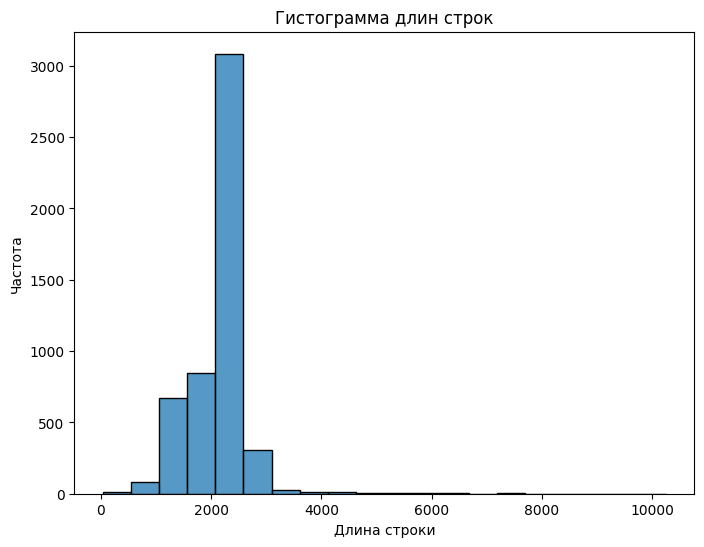

In [20]:
signal_lengths = [len(signal) for signal in list_signals]
mean_len = int(np.mean(signal_lengths))
print('Сред. знач.', mean_len)
     
# опред.сред длинну
plt.figure(figsize=(8, 6))
sns.histplot(signal_lengths, bins=20)  
plt.title("Гистограмма длин строк")
plt.xlabel("Длина строки"), plt.ylabel("Частота")
plt.show()

In [21]:
const_len = int(mean_len * 0.5)
print('const_len', const_len)
print(sum(1 for signal in list_signals if len(signal) < const_len))

const_len 1083
104


In [22]:
list_array = []
for signal in list_signals:
    if len(signal) < const_len:
        # print(len(signal), 'Выброс удален')
        continue
    else:
        list_array.append(signal[:const_len-1])      
    
print(len(list_signals), '-->', len(list_array))

5069 --> 4965


In [23]:
# ds_signals_df = pd.DataFrame(list_array).transpose()
# ds_signals_df.to_csv('dopler_signals_all_dataset.csv', index=False, sep=';', encoding='utf-8-sig')

### Расчет статистики

In [114]:
import numpy as np

# Предположим, что у вас есть временной сигнал в переменной signal
# signal = ...

# Выполним преобразование Фурье
signal = list_array[0]
fft_result = np.fft.fft(signal)

# Вычислим спектральную плотность мощности
power_spectrum = np.abs(fft_result) ** 2

# Нормализуем спектральную плотность мощности
power_spectrum /= power_spectrum.sum()

# Вычислим спектральную энтропию
spectral_entropy = -np.sum(power_spectrum * np.log2(power_spectrum))
print("спектральная энтропия:", spectral_entropy)

# Вычислим амплитуды частот
amplitudes = np.abs(fft_result)

# Вычислим частоты
N = len(signal)
sampling_rate = 1000  # предполагаемая частота дискретизации в Гц
frequencies = np.fft.fftfreq(N, d=1/sampling_rate)

# Найдем взвешенную среднюю частоту
weighted_avg_frequency = np.sum(frequencies * amplitudes) / np.sum(amplitudes)

# Переведем в кГц
average_frequency_kHz = weighted_avg_frequency / 1000

print("Средняя частота:", average_frequency_kHz, "кГц")

# Вычислим амплитуды частот
amplitudes = np.abs(fft_result)

# Вычислим частоты
N = len(signal)
sampling_rate = 1000  # предполагаемая частота дискретизации в Гц
frequencies = np.fft.fftfreq(N, d=1/sampling_rate)

# Найдем взвешенную среднюю частоту
weighted_avg_frequency = np.sum(frequencies * amplitudes) / np.sum(amplitudes)

# Найдем стандартное отклонение частоты
std_dev_frequency = np.sqrt(np.sum(amplitudes * (frequencies - weighted_avg_frequency)**2) / np.sum(amplitudes))

print("Стандартное отклонение частоты:", std_dev_frequency, "Гц")

спектральная энтропия: 10.076870818238637
Средняя частота: -0.00046544599384447356 кГц
Стандартное отклонение частоты: 288.6029519075202 Гц


In [116]:
df = getStatisticaTable(list_array)
print("Распределение классов:")
print(df['id'].value_counts()) # проверка на кол-во классов
print("Распределение направлений:")
print(df['direction'].value_counts()) # проверка на кол-во классов
df.head(3)

Распределение классов:
0    2849
1    2116
Name: id, dtype: int64
Распределение направлений:
2    1910
4    1731
0    1324
Name: direction, dtype: int64


,id,direction,distance,len,Кол-во пиков,Сред.зн.пика,Min,Max,Медиана,Смещение низ,...,Сумма,Размах,Ниж.квартиль,Верх.квартиль,Дисперсия,Асимметрия,Куртозис,Std откл.,Коэф.вариации,Std ошибка
0,1,0,6656,1077,82,6.616,3.836,7.216,5.428,1.592,...,5857.573,3.379,4.744,6.157,0.660,0.033,-1.112,0.812,0.149,0.025
1,1,0,6625,1077,74,5.802,3.226,6.143,4.719,1.493,...,5060.852,2.917,4.081,5.323,0.555,0.024,-1.114,0.745,0.159,0.023
2,1,0,6592,1077,76,5.347,3.027,5.718,4.363,1.336,...,4674.480,2.691,3.700,4.967,0.497,0.022,-1.263,0.705,0.162,0.021


In [117]:
file_name = './datasets/all_dataset.csv'
df.to_csv(file_name, index=False, sep=';', encoding='utf-8-sig')
# data = df.copy()

In [118]:
data = pd.read_csv(file_name, sep=";", encoding='utf8') #, low_memory=False)
data.head(2)

,id,direction,distance,len,Кол-во пиков,Сред.зн.пика,Min,Max,Медиана,Смещение низ,...,Сумма,Размах,Ниж.квартиль,Верх.квартиль,Дисперсия,Асимметрия,Куртозис,Std откл.,Коэф.вариации,Std ошибка
0,1,0,6656,1077,82,6.616,3.836,7.216,5.428,1.592,...,5857.573,3.379,4.744,6.157,0.660,0.033,-1.112,0.812,0.149,0.025
1,1,0,6625,1077,74,5.802,3.226,6.143,4.719,1.493,...,5060.852,2.917,4.081,5.323,0.555,0.024,-1.114,0.745,0.159,0.023


### Категориальные признаки

In [119]:
direction_dummies = pd.get_dummies(data['direction'])
direction_dummies

,0,2,4
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
4960,1,0,0
4961,1,0,0
4962,1,0,0
4963,1,0,0


In [122]:
df_dummies = pd.DataFrame({
    'X0': direction_dummies.iloc[:, 0].values,
    'X1': direction_dummies.iloc[:, 1].values,
    'X2': direction_dummies.iloc[:, 2].values,
    # 'X3': direction_dummies.iloc[:, 3].values,
    # 'X4': direction_dummies.iloc[:, 4].values,
    # 'X5': direction_dummies.iloc[:, 5].values
})
df_dummies

,X0,X1,X2
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
4960,1,0,0
4961,1,0,0
4962,1,0,0
4963,1,0,0


In [123]:
df_isx = pd.concat([data, df_dummies], axis=1)
file_name_dum = './datasets/all_dataset_dum.csv'
df_isx.to_csv(file_name_dum, index=False, sep=';', encoding='utf-8-sig')
df_isx.head(2)

,id,direction,distance,len,Кол-во пиков,Сред.зн.пика,Min,Max,Медиана,Смещение низ,...,Верх.квартиль,Дисперсия,Асимметрия,Куртозис,Std откл.,Коэф.вариации,Std ошибка,X0,X1,X2
0,1,0,6656,1077,82,6.616,3.836,7.216,5.428,1.592,...,6.157,0.660,0.033,-1.112,0.812,0.149,0.025,1,0,0
1,1,0,6625,1077,74,5.802,3.226,6.143,4.719,1.493,...,5.323,0.555,0.024,-1.114,0.745,0.159,0.023,1,0,0


# Предобработка

### Балансировка класса

In [124]:
df_isx.id.value_counts()

0    2849
1    2116
Name: id, dtype: int64

In [125]:
df_balance = df_isx
len_index_1 = len(df_balance[df_balance['id'] == 1].index)
list_index_0 = df[df_balance['id'] == 0].index
for i in range(len(list_index_0) - len_index_1):
    df_balance = df_balance.drop(list_index_0[i])
df_balance['id'].value_counts()

1    2116
0    2116
Name: id, dtype: int64

In [126]:
df_balance.shape

(4232, 28)

In [127]:
file_name_dum_balance = './datasets/all_dataset_dum_balance.csv'
df_balance.to_csv(file_name_dum_balance, index=False, sep=';', encoding='utf-8-sig')
df_balance.head(2)

,id,direction,distance,len,Кол-во пиков,Сред.зн.пика,Min,Max,Медиана,Смещение низ,...,Верх.квартиль,Дисперсия,Асимметрия,Куртозис,Std откл.,Коэф.вариации,Std ошибка,X0,X1,X2
0,1,0,6656,1077,82,6.616,3.836,7.216,5.428,1.592,...,6.157,0.660,0.033,-1.112,0.812,0.149,0.025,1,0,0
1,1,0,6625,1077,74,5.802,3.226,6.143,4.719,1.493,...,5.323,0.555,0.024,-1.114,0.745,0.159,0.023,1,0,0


### Наростим признаки

In [33]:
# def polynomialFeatures(data):
    

In [35]:
data = df
data_filter = data.drop(['id', 'len'], axis=1)
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(data_filter)

# Получение имен для полиномиальных признаков
poly_feature_names = poly.get_feature_names_out(data_filter.columns)
# print(poly_feature_names)

# Создание DataFrame для полиномиальных признаков
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Объединение полиномиальных признаков с исходным DataFrame
df_sintetic = pd.concat([data, df_poly], axis=1)
df_sintetic.head(3)

,id,direction,distance,len,Кол-во пиков,Сред.зн.пика,Min,Max,Медиана,Смещение низ,...,Куртозис^2,Куртозис Std откл.,Куртозис Коэф.вариации,Куртозис Std ошибка,Std откл.^2,Std откл. Коэф.вариации,Std откл. Std ошибка,Коэф.вариации^2,Коэф.вариации Std ошибка,Std ошибка^2
0,1,0,6656,1077,216,530.898,3.836,7.216,5.428,1.592,...,1.236544,-0.902944,-0.165688,-0.027800,0.659344,0.120988,0.020300,0.022201,0.003725,0.000625
1,1,0,6625,1077,216,532.741,3.226,6.143,4.719,1.493,...,1.240996,-0.829930,-0.177126,-0.025622,0.555025,0.118455,0.017135,0.025281,0.003657,0.000529
2,1,0,6592,1077,209,544.368,3.027,5.718,4.363,1.336,...,1.595169,-0.890415,-0.204606,-0.026523,0.497025,0.114210,0.014805,0.026244,0.003402,0.000441


# Корреляция признаков

Const-значения: Index(['len'], dtype='object')


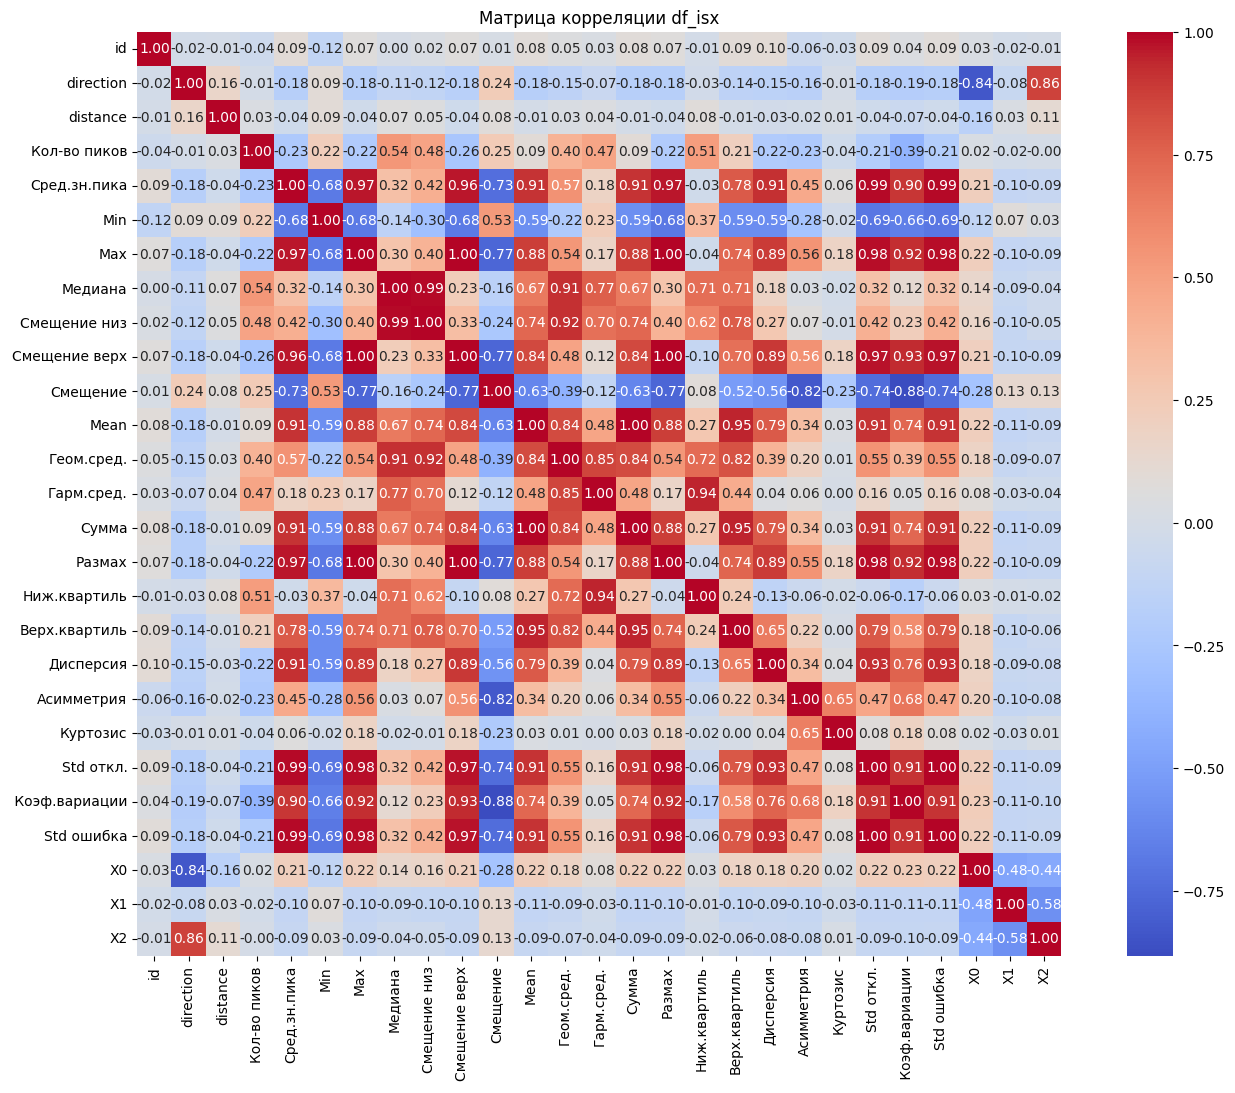

In [128]:
correlationMatrix(df_isx, 'df_isx', (17, 12))
# correlationMatrix(df, 'df')
# correlationMatrix(df_balance, 'df_balance')

Const-значения: Index([], dtype='object')


C:\Users\Анна\AppData\Local\Temp\ipykernel_1528\3588864463.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df.drop(columns=columns_to_drop, inplace=True)


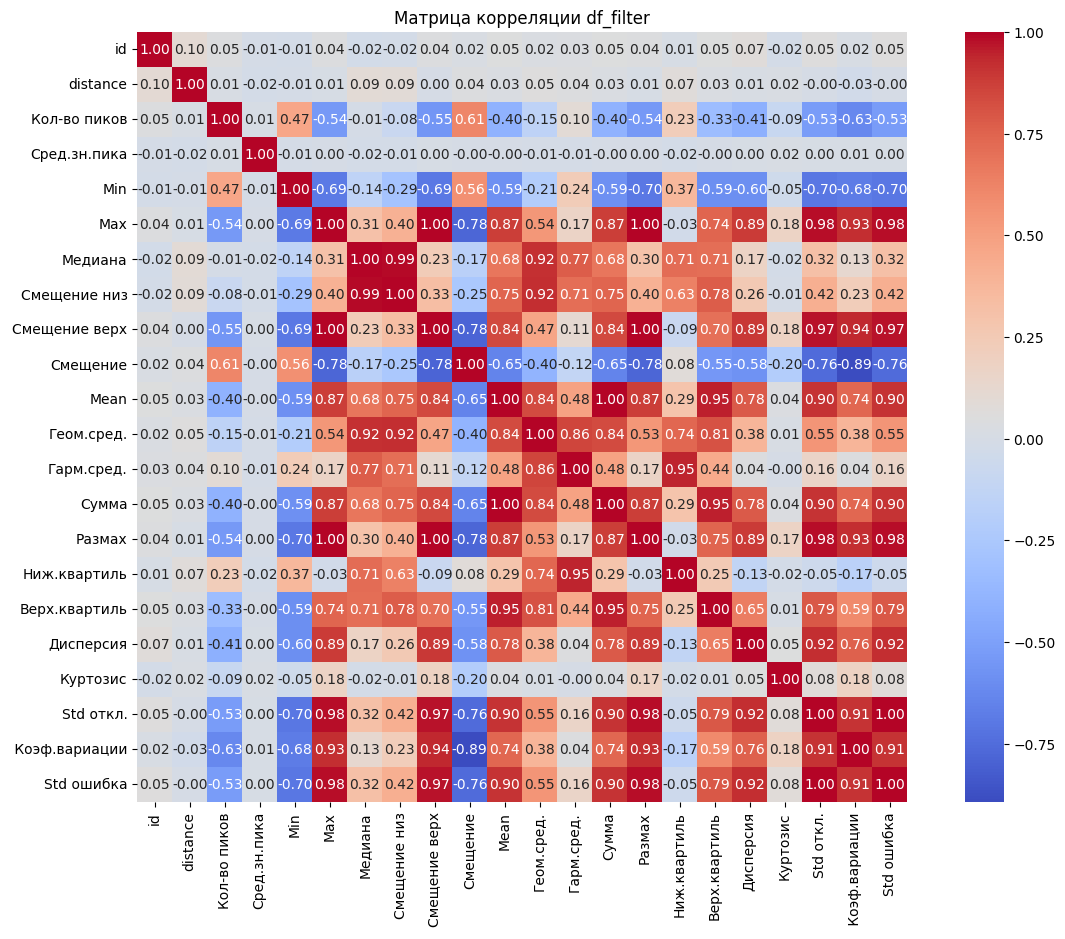

In [61]:
# df_filter = df_isx[['id', 'distance', 'Кол-во пиков', 'Сред.зн.пика', 'Min',
#        'Ниж.квартиль', 'Верх.квартиль', 'Дисперсия', 'Куртозис',
#        'X0', 'X1', 'X2']]

df_filter = df_balance[['id', 'distance', 'Кол-во пиков', 'Сред.зн.пика', 'Min',
       'Max', 'Медиана', 'Смещение низ', 'Смещение верх', 'Смещение', 'Mean',
       'Геом.сред.', 'Гарм.сред.', 'Сумма', 'Размах', 'Ниж.квартиль',
       'Верх.квартиль', 'Дисперсия', 'Куртозис', 'Std откл.',
       ' Коэф.вариации', 'Std ошибка']]
correlationMatrix(df_filter, 'df_filter', (15, 10))

In [38]:
correlationFeatures(df_isx, 'df_isx', 10)
correlationFeatures(df_balance, 'df_isx', 10)

Features top 10 in df_isx:
0.12 - Min
0.10 - Дисперсия
0.09 - Верх.квартиль
0.09 - Std ошибка
0.09 - Std откл.
0.08 - Сумма
0.08 - Mean
0.08 - Кол-во пиков
0.07 - Смещение верх
0.07 - Размах


Features top 10 in df_isx:
0.10 - distance
0.07 - Дисперсия
0.07 - direction
0.05 - Std ошибка
0.05 - Std откл.
0.05 - Верх.квартиль
0.05 - Асимметрия
0.05 - Mean
0.05 - Сумма
0.05 - Кол-во пиков




# Выбор значимых признаков

In [58]:
df_balance.keys()

Index(['id', 'direction', 'distance', 'Кол-во пиков', 'Сред.зн.пика', 'Min',
       'Max', 'Медиана', 'Смещение низ', 'Смещение верх', 'Смещение', 'Mean',
       'Геом.сред.', 'Гарм.сред.', 'Сумма', 'Размах', 'Ниж.квартиль',
       'Верх.квартиль', 'Дисперсия', 'Асимметрия', 'Куртозис', 'Std откл.',
       ' Коэф.вариации', 'Std ошибка'],
      dtype='object')

In [41]:
feature_1 = ['Max', 'Mean', 'Std откл.', 'Асимметрия', 'Куртозис', 'id'] 
feature_2 = ['Max', 'Куртозис', 'Гарм.сред.', 'Дисперсия', 'Асимметрия', 'id'] 
feature_3 = ['Max', 'Куртозис', 'Гарм.сред.', 'Std откл.', 'Асимметрия', 'Ниж.квартиль', 'Верх.квартиль', 'id'] 
feature_4 = ['Max', 'Куртозис', 'Гарм.сред.', 'Std откл.', 'Асимметрия', 'X0', 'X1', 'X2', 'id'] 
feature_5 = ['Max', 'Куртозис', 'Гарм.сред.', 'Std откл.', 'Асимметрия', 'distance', 'id'] 
feature_6 = ['Max', 'Куртозис', 'Гарм.сред.', 'Std откл.', 'Асимметрия', 'Кол-во пиков', 'Сред.зн.пика', 'id'] 
feature_7 = ['Max', 'Куртозис', 'Гарм.сред.', 'X0', 'X1', 'X2', 'distance', 'Кол-во пиков', 'Сред.зн.пика', 'id'] 

In [ ]:
# saveCsvFile(df[feature_1], file_data_out_feature)
# saveCsvFile(df[feature_2], file_data_out_feature_5)
# saveCsvFile(df[feature_3], file_data_out_feature_new_3)

### Поиск выбросов в признаках

In [ ]:
# getAnamaliesInDF(df_isx)

In [ ]:
# getAnamaliesInDF(df_filter)

# NN learning

In [42]:
print("        Precision", " Recall ", "  Accuracy   \n")

print('\n feature_1')
learningDataVariants(df_isx[feature_1])
print('\n feature_2')
learningDataVariants(df_isx[feature_2])
print('\n feature_3')
learningDataVariants(df_isx[feature_3])
print('\n feature_4')
learningDataVariants(df_isx[feature_4])
print('\n feature_5')
learningDataVariants(df_isx[feature_5])
print('\n feature_6')
learningDataVariants(df_isx[feature_6])
print('\n feature_7')
learningDataVariants(df_isx[feature_7])
print('\n df_isx')
learningDataVariants(df_isx)
print('\n df_filter')
learningDataVariants(df_filter)
print('\n df_balance')
learningDataVariants(df_balance)

        Precision  Recall    Accuracy   


 feature_1
none    0.18       0.6       0.59  --->  58.81%  --->  0.49%
std     0.18       0.6       0.59  --->  58.91%  --->  0.49%
minmax  0.17       0.62       0.59  --->  59.01%  --->  0.49%
robust  0.18       0.6       0.59  --->  58.91%  --->  0.49%

 feature_2
none    0.16       0.65       0.6  --->  59.52%  --->  0.49%
std     0.16       0.64       0.59  --->  59.42%  --->  0.49%
minmax  0.12       0.68       0.59  --->  59.11%  --->  0.46%
robust  0.16       0.65       0.6  --->  59.52%  --->  0.49%

 feature_3
none    0.21       0.57       0.59  --->  58.61%  --->  0.50%
std     0.2       0.57       0.58  --->  58.41%  --->  0.50%
minmax  0.17       0.6       0.59  --->  58.81%  --->  0.49%
robust  0.21       0.57       0.59  --->  58.61%  --->  0.50%

 feature_4
none    0.17       0.55       0.58  --->  57.70%  --->  0.48%
std     0.17       0.55       0.58  --->  57.60%  --->  0.48%
minmax  0.13       0.59       0.58  --->  58.01% 

# Оценка значимости признаков 

In [43]:
# Выборки для класса 1 и класса 2
data_class_1 = df[df['id'] == 1]
data_class_0 = df[df['id'] == 0]

data = df
data_features = data.drop('id', axis=1)
# data_features.keys()

In [44]:
results = pd.DataFrame(columns=['Feature', 't-statistic', 'p-value', 'status'])
for feature in data_features.columns:
    t_statistic, p_value = ttest_ind(data_class_1[feature], data_class_0[feature])
    status = p_value < 0.05  
    results = results.append({'Feature': feature, 't-statistic': round(t_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
# print(results)
status_results = results[results['status']]
print(status_results)

           Feature  t-statistic  p-value status
3     Кол-во пиков       5.4889   0.0000   True
5              Min      -8.4984   0.0000   True
6              Max       5.0724   0.0000   True
9    Смещение верх       5.1637   0.0000   True
11            Mean       5.8426   0.0000   True
12      Геом.сред.       3.2296   0.0012   True
14           Сумма       5.8426   0.0000   True
15          Размах       5.1375   0.0000   True
17   Верх.квартиль       6.6622   0.0000   True
18       Дисперсия       7.1097   0.0000   True
19      Асимметрия      -4.2116   0.0000   True
20        Куртозис      -2.1648   0.0305   True
21       Std откл.       6.2183   0.0000   True
22   Коэф.вариации       2.8078   0.0050   True
23      Std ошибка       6.2194   0.0000   True


C:\Users\Анна\AppData\Local\Temp\ipykernel_1528\3466556109.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 't-statistic': round(t_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_1528\3466556109.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 't-statistic': round(t_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_1528\3466556109.py:5: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results = results.append({'Feature': feature, 't-statist

In [45]:
results = pd.DataFrame(columns=['Feature', 'u-statistic', 'p-value', 'status'])
for feature in data_features.columns:
    u_statistic, p_value =  stats.mannwhitneyu(data_class_1[feature], data_class_0[feature])
    status = p_value < 0.05 
    results = results.append({'Feature': feature, 'u-statistic': round(u_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
    # results = pd.concat([results, pd.DataFrame({'Feature': [feature], 
    #                                             'u-statistic': [round(u_statistic, 4)], 
    #                                             'p-value': [round(p_value, 4)], 
                                                # 'status': [status]})], ignore_index=True)

# print(results)
status_results = results[results['status']]
print(status_results)

           Feature  u-statistic  p-value status
3     Кол-во пиков    3333977.5   0.0000   True
5              Min    2467542.0   0.0000   True
6              Max    2861527.5   0.0022   True
7          Медиана    2649904.0   0.0000   True
8     Смещение низ    2855734.0   0.0015   True
11            Mean    2838182.0   0.0004   True
12      Геом.сред.    2788732.5   0.0000   True
13      Гарм.сред.    2441725.0   0.0000   True
14           Сумма    2838206.0   0.0004   True
16    Ниж.квартиль    2404287.0   0.0000   True
18       Дисперсия    3115181.0   0.0433   True
19      Асимметрия    3137048.0   0.0139   True
20        Куртозис    2627778.5   0.0000   True
21       Std откл.    3115310.0   0.0430   True
22   Коэф.вариации    3505978.0   0.0000   True
23      Std ошибка    3118282.0   0.0370   True


C:\Users\Анна\AppData\Local\Temp\ipykernel_1528\3866125891.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'u-statistic': round(u_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_1528\3866125891.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'u-statistic': round(u_statistic, 4), 'p-value': round(p_value, 4), 'status': status}, ignore_index=True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_1528\3866125891.py:5: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results = results.append({'Feature': feature, 'u-statist

# NN own

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import random

In [47]:
def trainNN(X_train, X_test, y_train, y_test, model, epochs, batch = 8): 
    model.compile(optimizer="adam", loss='binary_crossentropy',metrics=["accuracy"])
    model_name = [name for name, obj in globals().items() if obj is model][0]
    
    # history = model.fit(X_train, y_train, batch_size=8, epochs=10,validation_split=0.05, verbose=0)
    model.fit(X_train, y_train, 
              batch_size=batch, epochs=epochs, 
              validation_data=(X_test, y_test),
              # validation_split=0.3, 
              verbose=0)
    
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    # print(y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')     
    scores=model.evaluate(X_test, y_test, verbose=0)

    print(model_name, " acc = %.2f%%" % (scores[1]*100), 'f1 = %.2f%%' % f1)
    # print(model_name, " Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

In [ ]:
# # def models_init(size):
# print(size)
# keras.backend.clear_session()

# model_8_10_1 = Sequential([
#     keras.layers.Dense(8, input_dim=size, activation='relu'),
#     keras.layers.Dense(10, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model_32_128_1 = Sequential([
#     keras.layers.Dense(32, input_dim=size, activation='relu'),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model_32_64_1 = Sequential([
#     keras.layers.Dense(32, input_dim=size, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model_32_64_64_1 = Sequential([
#     keras.layers.Dense(32, input_dim=size, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model_16_32_32_16 = Sequential([
#     keras.layers.Dense(16, input_dim=size, activation='relu'),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

### [feature_1]

In [48]:
data_f = df_isx[feature_1]
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

(3972, 5)
32/32 [==============================] - 0s 521us/step
model_8_10_1  acc = 58.21% f1 = 0.47%
32/32 [==============================] - 0s 631us/step
model_8_10_1  acc = 68.18% f1 = 0.68%
32/32 [==============================] - 0s 500us/step
model_32_128_1  acc = 62.03% f1 = 0.62%
32/32 [==============================] - 0s 708us/step
model_32_128_1  acc = 68.18% f1 = 0.67%


### [feature_2]

In [49]:
data_f = df_isx[feature_2]
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

(3972, 5)
32/32 [==============================] - 0s 700us/step
model_8_10_1  acc = 60.42% f1 = 0.56%
32/32 [==============================] - 0s 762us/step
model_8_10_1  acc = 67.37% f1 = 0.66%
32/32 [==============================] - 0s 831us/step
model_32_128_1  acc = 56.19% f1 = 0.37%
32/32 [==============================] - 0s 775us/step
model_32_128_1  acc = 64.25% f1 = 0.58%


### [feature_3]

In [50]:
data_f = df_isx[feature_3]
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

(3972, 7)
32/32 [==============================] - 0s 789us/step
model_8_10_1  acc = 58.91% f1 = 0.50%
32/32 [==============================] - 0s 439us/step
model_8_10_1  acc = 66.26% f1 = 0.66%
32/32 [==============================] - 0s 700us/step
model_32_128_1  acc = 60.62% f1 = 0.53%
32/32 [==============================] - 0s 618us/step
model_32_128_1  acc = 70.19% f1 = 0.70%


### [feature_4]

In [51]:
data_f = df_isx[feature_4]
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

(3972, 8)
32/32 [==============================] - 0s 635us/step
model_8_10_1  acc = 56.50% f1 = 0.37%
32/32 [==============================] - 0s 798us/step
model_8_10_1  acc = 64.95% f1 = 0.65%
32/32 [==============================] - 0s 702us/step
model_32_128_1  acc = 63.14% f1 = 0.63%
32/32 [==============================] - 0s 618us/step
model_32_128_1  acc = 69.18% f1 = 0.69%


### [feature_7]

In [52]:
data_f = df_isx[feature_7]
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 16)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 16)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

(3972, 9)
32/32 [==============================] - 0s 626us/step
model_8_10_1  acc = 60.73% f1 = 0.55%
32/32 [==============================] - 0s 652us/step
model_8_10_1  acc = 60.22% f1 = 0.59%
32/32 [==============================] - 0s 630us/step
model_32_128_1  acc = 56.29% f1 = 0.36%
32/32 [==============================] - 0s 890us/step
model_32_128_1  acc = 59.72% f1 = 0.52%


### [df_filter]

In [53]:
data_f = df_filter
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 32)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 32)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 32)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

(3972, 12)
32/32 [==============================] - 0s 495us/step
model_8_10_1  acc = 56.29% f1 = 0.39%
32/32 [==============================] - 0s 1ms/step
model_8_10_1  acc = 43.81% f1 = 0.31%
32/32 [==============================] - 0s 568us/step
model_32_128_1  acc = 44.11% f1 = 0.31%
32/32 [==============================] - 0s 557us/step
model_32_128_1  acc = 63.04% f1 = 0.63%


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(64, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 32)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)


In [54]:

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(16, input_dim=size, activation='relu'),
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, input_dim=size, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 32)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 32)

32/32 [==============================] - 0s 503us/step
model_32_128_1  acc = 43.81% f1 = 0.31%
32/32 [==============================] - 0s 754us/step
model_32_128_1  acc = 60.22% f1 = 0.52%


### [df_isx]

In [55]:
data_f = df_isx
y = data_f['id']  # Target variable
X = data_f.drop('id', axis=1)  # Features
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)

keras.backend.clear_session()
np.random.seed(42)
model_8_10_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 10, 32)
trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 100, 32)
# trainNN(X_train, X_test, y_train, y_test, model_8_10_1, 1000, 32)

keras.backend.clear_session()
np.random.seed(42)
model_32_128_1 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 10, 32)
trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 100, 32)
# trainNN(X_train, X_test, y_train, y_test, model_32_128_1, 1000, 32)

(3972, 26)
32/32 [==============================] - 0s 544us/step
model_8_10_1  acc = 56.50% f1 = 0.37%
32/32 [==============================] - 0s 503us/step
model_8_10_1  acc = 46.42% f1 = 0.36%
32/32 [==============================] - 0s 510us/step
model_32_128_1  acc = 45.42% f1 = 0.44%
32/32 [==============================] - 0s 639us/step
model_32_128_1  acc = 56.29% f1 = 0.36%


## scaler

In [ ]:
def NN_train(X_train, y_train, X_test, y_test, model, epochs, batch = 8): 
    model.compile(optimizer="adam", loss='binary_crossentropy',metrics=["accuracy"])

    model_name = [name for name, obj in globals().items() if obj is model][0]
    
    # history = model.fit(X_train, y_train, batch_size=8, epochs=10,validation_split=0.05, verbose=0)
    model.fit(X_train, y_train, batch_size=batch, epochs=epochs,validation_split=0.05, verbose=0)
    scores=model.evaluate(X_test, y_test, verbose=0)
    print(model_name, epochs, " Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

In [ ]:
data = df[feature_2]
y = data['id']  # Target variable
X = data.drop('id', axis=1)  # Features

X = StandardScaler().fit_transform(X)
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

keras.backend.clear_session()
np.random.seed(42)
model_std_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

NN_train(X_train, y_train, X_test, y_test, model_std_1, 10, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_1, 100, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_1, 1000, 32)

In [ ]:
data = df[feature_3]
y = data['id']  # Target variable
X = data.drop('id', axis=1)  # Features

X = StandardScaler().fit_transform(X)
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

keras.backend.clear_session()
np.random.seed(42)
model_std_1 = Sequential([
    keras.layers.Dense(8, input_dim=size, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

NN_train(X_train, y_train, X_test, y_test, model_std_1, 10, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_1, 100, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_1, 1000, 32)

In [ ]:
data = df[feature_2]
y = data['id']  # Target variable
X = data.drop('id', axis=1)  # Features

X = StandardScaler().fit_transform(X)
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

keras.backend.clear_session()
np.random.seed(42)
model_std_3 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

NN_train(X_train, y_train, X_test, y_test, model_std_3, 10, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_3, 100, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_3, 1000, 32)

In [ ]:
data = df[feature_3]
y = data['id']  # Target variable
X = data.drop('id', axis=1)  # Features

X = StandardScaler().fit_transform(X)
size = (X).shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

keras.backend.clear_session()
np.random.seed(42)
model_std_3 = Sequential([
    keras.layers.Dense(32, input_dim=size, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

NN_train(X_train, y_train, X_test, y_test, model_std_3, 10, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_3, 100, 32)
NN_train(X_train, y_train, X_test, y_test, model_std_3, 1000, 32)